<a href="https://colab.research.google.com/github/ahmedhassan97/-ahmedhasRegression_using_multiple-variable/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# include library in python 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#import data.csv for training 


path = 'data.csv'
data = pd.read_csv(path, header=None, names=['size',
'Bedrooms','price'])

data = 
    size  Bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500
**************************************
data.describe = 
               size   Bedrooms          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
**************************************


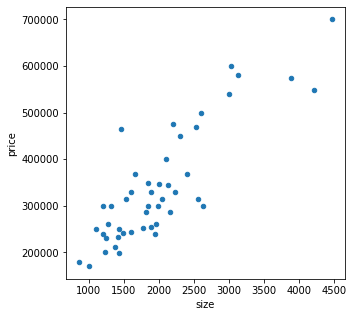

In [14]:
#show data details
print('data = \n' ,data.head(10))
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')
#draw data
data.plot(kind='scatter', x='size', y='price', figsize=(5,5))


In [16]:
#rescalling data into range (-1,1)

#this is facilite data processing

data = (data - data.mean())/data.std()

print("data after rescalling \n")

print("data \n",data.head(10))

data after rescalling 

data 
        size  Bedrooms     price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036
7 -0.721881 -0.223675 -1.130948
8 -0.781023 -0.223675 -1.026973
9 -0.637573 -0.223675 -0.783051


In [0]:
# adding ones in column 0

data.insert(0, 'Ones', 1)

In [23]:
cols = data.shape[1]    ##this extract column    47 * 3   

X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

print("x data is = \n",X.head(10))
print("y data is = \n",y.head(10))

x data is = 
    Ones      size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675
y data is = 
       price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
8 -1.026973
9 -0.783051


In [51]:
# convert data into matrix

X = np.matrix(X)

y = np.matrix(y)
theta = np.matrix(np.array([0,0,0]))
print(" x shape is = ",X.shape)
print(" y shape is = ",y.shape)
print(" theta shape is = ",theta.shape)

 x shape is =  (47, 3)
 y shape is =  (47, 1)
 theta shape is =  (1, 3)


In [0]:
#function to compue cost 
def computeCost(X, y, theta):
  
  z = np.power(((X * theta.T) - y), 2)

  return np.sum(z) / (2 * len(X))

In [0]:
#define function to gradient discent 

def gradientDescent(X, y, theta, alpha, iters):

  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)
  for i in range(iters):

    error = (X * theta.T) - y

    for j in range(parameters):
      
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
    theta = temp
    cost[i] = computeCost(X, y, theta)
  return theta, cost



In [72]:
# initialize variables for learning rate and iterations
alpha = 0.2
iters = 100000
# perform linear regression on the data set
theta_final,cost2= gradientDescent(X, y, theta, alpha, iters)
# get the cost (error) of the model
thiscost = computeCost(X, y, theta_final)
print('theta_final = ' , theta_final)
print('cost2 = ' , cost2[0:50] )
print('computeCost = ' , thiscost)


[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648433e+